## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from yahoo finance

In [22]:
import yfinance as yf
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def get_historical_data(start_date,end_date):
    ''' Daily quotes from Yahoo Finance.'''
    # Read the stock tickers that make up S&P500
    tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

    # Get the data for this tickers from yahoo finance
    data = yf.download(['GOOGL'],start_date, end_date, auto_adjust=True)
    return data

 **Step 2:** get the data of desired firm from [Yahoo Finance](https://finance.yahoo.com/quote/ES%3DF/history?period1=1541548800&period2=1699315200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true).

In [2]:
data = pd.read_csv('google.csv') # from November 1, 2018 to November 1, 2023
print(data.head())

        Open       High        Low      Close    Volume
0  54.570000  54.994999  53.890999  54.299000  40132000
1  54.450001  54.900002  53.382999  53.574501  43438000
2  53.626499  53.667500  51.700001  52.786499  45358000
3  52.750999  53.991001  52.680500  53.478500  28660000
4  54.174500  55.496498  54.029499  55.411999  43388000


**Step 3:** Write the data to a csv file.

In [3]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Open       High        Low      Close    Volume
0  54.570000  54.994999  53.890999  54.299000  40132000
1  54.450001  54.900002  53.382999  53.574501  43438000
2  53.626499  53.667500  51.700001  52.786499  45358000
3  52.750999  53.991001  52.680500  53.478500  28660000
4  54.174500  55.496498  54.029499  55.411999  43388000


Open   --- mean : 95.51457281120258   	 Std:  29.978953321421976   	 Max:  151.25   	 Min:  49.21599960327149
High   --- mean : 96.620317906734   	 Std:  30.268359930462225   	 Max:  151.54649353027344   	 Min:  50.60599899291992
Low    --- mean : 94.46551357988525   	 Std:  29.64812332792885   	 Max:  148.8990020751953   	 Min:  48.882999420166016
Close  --- mean : 95.56837155046972   	 Std:  29.946405542668067   	 Max:  149.8385009765625   	 Min:  49.23350143432617
Volume --- mean : 34065543.198090695   	 Std:  15126983.392302053   	 Max:  133178000   	 Min:  9312000


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [5]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


   Item        Open       Close    Volume
0     0  125.059998  124.080002  26292300
1     1  123.209999  124.459999  28940100
2     2  122.879997  122.169998  44566500
3     3  123.269997  122.279999  57061100
4     4  128.160004  125.610001  84366200
---
      Item       Open      Close    Volume
1252  1252  54.174500  55.411999  43388000
1253  1253  52.750999  53.478500  28660000
1254  1254  53.626499  52.786499  45358000
1255  1255  54.450001  53.574501  43438000
1256  1256  54.570000  54.299000  40132000


**Step 2.1:**  Visualize raw data.

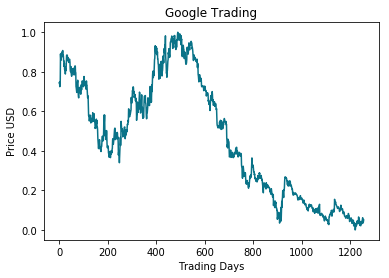

In [21]:
%matplotlib inline
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [19]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.743321  0.743964  0.137086
1     1  0.725190  0.747741  0.158462
2     2  0.721955  0.724979  0.284618
3     3  0.725778  0.726072  0.385490
4     4  0.773703  0.759172  0.605931


Open   --- mean : 0.4537563265961632   	 Std:  0.2938133681405987   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.4605623013465754   	 Std:  0.29766319446277495   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.19984130591195856   	 Std:  0.12212377401629218   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

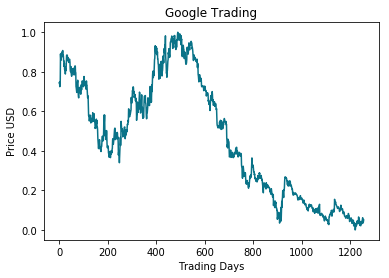

In [18]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [9]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Linear Regression Model

In this section we will create and train a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.743321,0.743964,0.137086
1,1,0.725190,0.747741,0.158462
2,2,0.721955,0.724979,0.284618
3,3,0.725778,0.726072,0.385490
4,4,0.773703,0.759172,0.605931


**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (862, 1)
y_train (862, 1)
x_test (395, 1)
y_test (395, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

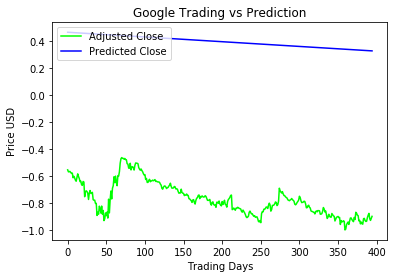

In [14]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7909 MSE (0.8894 RMSE)
Test Score: 1.37680620 MSE (1.17337385 RMSE)
